<a href="https://colab.research.google.com/github/leen449/Data-Science/blob/main/Copy_of_LabeledData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Retreival

In [2]:
# Colab cell: install, configure, and test PRAW (run the whole cell)
!pip install -q praw pandas

import praw
import pandas as pd
from datetime import datetime
from getpass import getpass
import time

# -----------------------------
# 1) Enter your credentials
# -----------------------------
# client_id: the short 14-char id shown under your app name on https://www.reddit.com/prefs/apps
# client_secret: shown when you click "edit" on your app (keep it secret)
# reddit_username: your reddit username (used in user_agent)

client_id = "hEXBI-j9iyrM_UsdLnmuAA".strip()
client_secret = getpass("Client secret (hidden input): ").strip()     # hidden input so you don't paste secret in notebook output
reddit_username = "Proof-Wolf-8881".strip()

# remove accidental invisible whitespace (tabs/newlines) that often cause 401 errors
client_id = client_id.strip()
client_secret = client_secret.strip()
reddit_username = reddit_username.strip()

# -----------------------------
# 2) Create a clear user_agent
# -----------------------------
# Make it descriptive (project name, version, and your reddit username)
user_agent = f"OffenseAgeProject/0.1 by u/{reddit_username}"

# -----------------------------
# 3) Create the PRAW Reddit instance
# -----------------------------
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

# Basic authorization check
print("read-only status (should be True):", reddit.read_only)

# -----------------------------
# 4) Small tests: fetch posts and comments
# -----------------------------
try:
    print("\nFetching 3 hot posts from r/AskReddit (titles):")
    for i, post in enumerate(reddit.subreddit("AskReddit").hot(limit=3), start=1):
        print(f"{i}. {post.title[:200]} (id={post.id})")
    time.sleep(1)

    print("\nFetching 5 recent comments from r/AskReddit:")
    for c in reddit.subreddit("AskReddit").comments(limit=5):
        author = c.author.name if c.author else "[deleted]"
        created = datetime.utcfromtimestamp(c.created_utc).strftime("%Y-%m-%d %H:%M:%S")
        text_preview = c.body.replace("\n", " ")[:200]
        print(f"- [{created}] {author}: {text_preview}")
except Exception as e:
    print("Error while fetching data:", type(e).__name__, str(e))
    print("\nIf you see a 401 error, check the troubleshooting steps below.")


Client secret (hidden input): ··········


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



read-only status (should be True): True

Fetching 3 hot posts from r/AskReddit (titles):
1. Men in happy marriages, what is one thing or skill you would teach other men to have good relationships as well? (id=1npaxzb)
2. Rapture aftermath. How are the Christians you know that went all-in handling being left behind right now? (id=1npg7ze)
3. What is the worst mistake a US President has ever made? (id=1np2uz0)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




Fetching 5 recent comments from r/AskReddit:
- [2025-09-24 17:21:32] jofra6: Communicate well and leave space for your spouse to express their needs and desires. Work together and be willing to compromise to achieve that.   It's worked for us 8 years as of yesterday and in the
- [2025-09-24 17:21:32] alien1583: Tell my mom to get more aggressive cancer treatments. I have a good life regardless, but I think I'd still turn out okay if I forgot about everything else.
- [2025-09-24 17:21:31] needlestack: No insertion, just touching. That was all it took to turn me off on what felt like a biological level -- I barely had time to realize what was happening before my dick was going limp.  Sensations are 
- [2025-09-24 17:21:31] PianoSufficient6692: Ford pardoning Nixon. Nixon should have been punished.
- [2025-09-24 17:21:30] Hot-Community-466: But it would be interesting to see the end


/tmp/ipython-input-3617734309.py:56: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  created = datetime.utcfromtimestamp(c.created_utc).strftime("%Y-%m-%d %H:%M:%S")


In [3]:
import pandas as pd

all_data = []

for sub in ["gaming", "movies", "politics"]:
    print(f"Collecting from r/{sub}...")
    batch = []
    for comment in reddit.subreddit(sub).comments(limit=200):
        if comment.author:
            batch.append({
                "subreddit": sub,
                "username": str(comment.author),
                "account_age_days": (datetime.utcnow() - datetime.utcfromtimestamp(comment.author.created_utc)).days,
                "comment_text": comment.body
            })
        time.sleep(1)  # pause to avoid 429

    # Save after each subreddit
    df_batch = pd.DataFrame(batch)
    df_batch.to_csv(f"reddit_{sub}.csv", index=False)
    print(f"Saved {len(df_batch)} comments from {sub}")
    all_data.extend(batch)

df = pd.DataFrame(all_data)
df.to_csv("reddit_all.csv", index=False)
print("✅ All done! Total:", len(df))


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



/tmp/ipython-input-786696942.py:13: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "account_age_days": (datetime.utcnow() - datetime.utcfromtimestamp(comment.author.created_utc)).days,
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

/tmp/ipython-input-786696942.py:13: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  "account_age_days": (datetime.utcnow() - datetime.utcfromtimestamp(comment.author.created_utc)).days,
It is strongly recommended to use Async PRAW: https://asyncpra

Saved 200 comments from gaming


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Saved 200 comments from movies


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Saved 200 comments from politics
✅ All done! Total: 600


# Cleaning the dataset

In [7]:
# Load the dataset
df = pd.read_csv('reddit_all.csv')

# Drop the 'username' column
df.drop('username', axis=1, inplace=True)

# Convert 'account_age_days' to 'account_age_years'
df['account_age_years'] = (df['account_age_days'] / 365.25).round(2)

# Drop the original 'account_age_days' column
df.drop('account_age_days', axis=1, inplace=True)

# Reorder the columns as requested
df = df[['subreddit', 'account_age_years', 'comment_text']]

# Print the first 5 rows of the modified DataFrame to verify the changes
print(df.head())

# Save the modified DataFrame to a new CSV file
df.to_csv('modified_reddit_data.csv', index=False)

  subreddit  account_age_years  \
0    gaming               8.45   
1    gaming              14.21   
2    gaming               0.56   
3    gaming              14.45   
4    gaming               0.85   

                                        comment_text  
0                                    The Xexiest Box  
1                                              Myst.  
2  The legend of a player casting a fire spell on...  
3  It was still fun years after it came out as a ...  
4  Ah it sounded interesting aside from the "sing...  


# Integrating using weak supervision

In [9]:
pip install snorkel pandas numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 3.0 MB/s eta 0:00:00


In [10]:
import pandas as pd
import numpy as np
from snorkel.labeling import labeling_function
from snorkel.labeling import PandasLFApplier
from snorkel.labeling import LFAnalysis
from snorkel.labeling.model import LabelModel
import re



In [15]:




# Define labels as constants
TOXIC = 1
NOT_TOXIC = 0
ABSTAIN = -1

# Load the dataset
# Make sure 'modified_reddit_data.csv' is in the same directory as your script
df = pd.read_csv('modified_reddit_data.csv')

# Preprocessing is crucial for weak supervision.
# We'll fill any missing text values to prevent errors.
df['comment_text'] = df['comment_text'].fillna('')

## SECTION 1: DEFINE LABELING FUNCTIONS (LFs)

# LF1: Check for explicit profanity
# This is a strong signal for toxicity.
@labeling_function()
def check_profanity(x):
    toxic_words = ['fuck', 'shit', 'asshole', 'bitch', 'damn', 'crap', 'bullshit']
    return TOXIC if any(word in x.comment_text.lower() for word in toxic_words) else ABSTAIN

# LF2: Look for aggressive or demeaning language
# This targets a different type of toxicity.
@labeling_function()
def check_aggression(x):
    aggressive_phrases = [
        'you are so stupid',
        'you are an idiot',
        'you are an idiot',
        'you guys',
        'you son of a bitch'
    ]
    return TOXIC if any(phrase in x.comment_text.lower() for phrase in aggressive_phrases) else ABSTAIN

# LF3: Check for very short, non-substantive comments that might be toxic.
# Toxic comments are sometimes very short and lack detail.
@labeling_function()
def check_short_toxic_comment(x):
    if len(x.comment_text) <= 5 and check_profanity(x) == ABSTAIN and x.comment_text.lower() not in ['k.', 'yes.', 'no.']:
        return TOXIC
    return ABSTAIN

# LF4: Look for positive, gaming-related keywords.
# This helps us identify likely non-toxic comments.
@labeling_function()
def check_positive_gaming_terms(x):
    gaming_terms = ['great game', 'good times', 'fun', 'awesome', 'amazing', 'brilliant', 'loved it']
    return NOT_TOXIC if any(term in x.comment_text.lower() for term in gaming_terms) else ABSTAIN

# LF5: Check for question marks, which are often in non-toxic comments.
@labeling_function()
def check_questions(x):
    return NOT_TOXIC if '?' in x.comment_text else ABSTAIN

# LF6: Check for URLs, which are usually not toxic.
@labeling_function()
def check_url(x):
    return NOT_TOXIC if 'http' in x.comment_text or 'www.' in x.comment_text else ABSTAIN

## SECTION 2: APPLY THE LABELING FUNCTIONS

# Group the labeling functions into a list
lfs = [
    check_profanity,
    check_aggression,
    check_short_toxic_comment,
    check_positive_gaming_terms,
    check_questions,
    check_url
]

# Apply the LFs to the DataFrame
applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=df)

## SECTION 3: ANALYZE AND TRAIN THE LABEL MODEL

# Optional: Analyze the labeling function coverage, conflicts, and overlaps
print("Labeling Function Analysis:")
print(LFAnalysis(L_train, lfs=lfs).lf_summary())

# Train the Label Model to combine the noisy labels
label_model = LabelModel(cardinality=2, verbose=True) # cardinality=2 for TOXIC/NOT_TOXIC
label_model.fit(L_train, n_epochs=500, log_freq=100, seed=123)

# Get the denoised labels (the "clean" training set)
df['toxic_label'] = label_model.predict(L=L_train)
df['toxic_probability'] = label_model.predict_proba(L=L_train)[:, TOXIC]

print("\n--- Example of Denoised Labels ---")
print(df[['comment_text', 'toxic_label', 'toxic_probability']].head(20))

## SECTION 4: USE LABELS TO TRAIN A FINAL CLASSIFIER

# Now you have a high-quality training dataset with a 'toxic_label' column.
# You can use this to train a more sophisticated model.

# Example with a simple scikit-learn classifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Filter out comments where the LabelModel abstained (-1)
df_clean = df[df['toxic_label'] != -1]

if not df_clean.empty:
    X_train, X_test, y_train, y_test = train_test_split(
        df_clean['comment_text'],
        df_clean['toxic_label'],
        test_size=0.2,
        random_state=42,
        stratify=df_clean['toxic_label']
    )

    # Create a classification pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', LogisticRegression())
    ])

    # Train the final model
    pipeline.fit(X_train, y_train)

    # Evaluate the model
    y_pred = pipeline.predict(X_test)
    print("\n--- Final Model Performance (on a subset of data) ---")
    print(classification_report(y_test, y_pred))

else:
    print("\nNo comments were labeled by the LabelModel. Please refine your labeling functions.")

100%|██████████| 600/600 [00:00<00:00, 7070.48it/s]


Labeling Function Analysis:
                             j Polarity  Coverage  Overlaps  Conflicts
check_profanity              0      [1]  0.060000  0.016667   0.015000
check_aggression             1      [1]  0.001667  0.001667   0.000000
check_short_toxic_comment    2      [1]  0.013333  0.003333   0.003333
check_positive_gaming_terms  3      [0]  0.040000  0.008333   0.001667
check_questions              4      [0]  0.163333  0.040000   0.015000
check_url                    5      [0]  0.035000  0.020000   0.001667


100%|██████████| 500/500 [00:00<00:00, 936.61epoch/s]


--- Example of Denoised Labels ---
                                         comment_text  toxic_label  \
0                                     The Xexiest Box           -1   
1                                               Myst.            0   
2   The legend of a player casting a fire spell on...           -1   
3   It was still fun years after it came out as a ...            0   
4   Ah it sounded interesting aside from the "sing...           -1   
5   Looking at the OP's history, like wtf. Dude is...            0   
6                                           Minecraft           -1   
7   I had a castle that I placed the evening they ...           -1   
8   Yeah but I'm saying in reference to all these ...           -1   
9   I don’t agree that that is what modern PvP mmo...           -1   
10  Very glad to hear that, considering I really l...           -1   
11                     This was a freakin' great one.           -1   
12  Oh man, that must've been *ages* ago. I would ... 


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# The second approach using pre-trained model

In [17]:
pip install snorkel

In [18]:
from snorkel.labeling import labeling_function

# Define labels for clarity
TOXIC = 1
NOT_TOXIC = 0
ABSTAIN = -1

# Labeling Function 1: Check for a list of toxic words
toxic_words = {'hate', 'racist', 'kill', 'stupid', 'idiot', 'moron', 'cringe'}
@labeling_function()
def lf_keywords_toxic(x):
    return TOXIC if any(word in x.comment_text.lower() for word in toxic_words) else ABSTAIN

# Labeling Function 2: Check for certain punctuation patterns that might indicate strong emotion
@labeling_function()
def lf_all_caps(x):
    # A simple rule: if a comment is long and all in caps, it might be toxic
    if len(x.comment_text) > 20 and x.comment_text.isupper():
        return TOXIC
    return ABSTAIN

# Labeling Function 3: Check for specific positive sentiment words to label as "not toxic"
positive_words = {'love', 'great', 'awesome', 'nice', 'good', 'happy'}
@labeling_function()
def lf_positive_keywords(x):
    return NOT_TOXIC if any(word in x.comment_text.lower() for word in positive_words) else ABSTAIN

In [20]:
import pandas as pd
from snorkel.labeling import labeling_function, PandasLFApplier
from snorkel.labeling.model import LabelModel

# Define the constants for the labels
TOXIC = 1
NOT_TOXIC = 0
ABSTAIN = -1

# Load the dataset (replace with your file name)
df = pd.read_csv('reddit_all.csv')

# Drop the 'username' column
df.drop('username', axis=1, inplace=True)

# Convert 'account_age_days' to 'account_age_years'
df['account_age_years'] = (df['account_age_days'] / 365.25).round(2)

# Drop the original 'account_age_days' column
df.drop('account_age_days', axis=1, inplace=True)

# Define the labeling functions
toxic_words = {'hate', 'racist', 'stupid', 'idiot', 'moron'}
@labeling_function()
def lf_keywords_toxic(x):
    return TOXIC if any(word in x.comment_text.lower() for word in toxic_words) else ABSTAIN

positive_words = {'love', 'great', 'awesome', 'nice', 'good', 'happy'}
@labeling_function()
def lf_positive_keywords(x):
    return NOT_TOXIC if any(word in x.comment_text.lower() for word in positive_words) else ABSTAIN

@labeling_function()
def lf_all_caps(x):
    if len(x.comment_text) > 20 and x.comment_text.isupper():
        return TOXIC
    return ABSTAIN

# Collect all labeling functions
lfs = [lf_keywords_toxic, lf_positive_keywords, lf_all_caps]

# Apply the LFs to the data
applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=df)

# Train the LabelModel
label_model = LabelModel(cardinality=2, verbose=True)
label_model.fit(L_train, n_epochs=500, log_freq=100, seed=123)

# Add the final 'toxicity' column to your dataframe
df['toxicity'] = label_model.predict(L_train)

# Display the first 10 rows with the new column
print(df.head(10))

# Save the final dataframe with the new column
df.to_csv('labeled_reddit_data.csv', index=False)

100%|██████████| 500/500 [00:01<00:00, 436.32epoch/s]

  subreddit                                       comment_text  \
0    gaming                                    The Xexiest Box   
1    gaming                                              Myst.   
2    gaming  The legend of a player casting a fire spell on...   
3    gaming  It was still fun years after it came out as a ...   
4    gaming  Ah it sounded interesting aside from the "sing...   
5    gaming  Looking at the OP's history, like wtf. Dude is...   
6    gaming                                          Minecraft   
7    gaming  I had a castle that I placed the evening they ...   
8    gaming  Yeah but I'm saying in reference to all these ...   
9    gaming  I don’t agree that that is what modern PvP mmo...   

   account_age_years  toxicity  
0               8.45        -1  
1              14.21        -1  
2               0.56        -1  
3              14.45         1  
4               0.85        -1  
5               9.21         0  
6               8.95        -1  
7        

# The third approach using transformers piplines to proccess the comments with level of toxicity

In [21]:
import pandas as pd
from transformers import pipeline
import torch

# Define the file name for the input dataset.
input_file = 'modified_reddit_data.csv'
output_file = 'labeled_reddit_data.csv'

# Load the modified dataset
try:
    df = pd.read_csv(input_file)
    print(f"Loading file: {input_file}")
except FileNotFoundError:
    print(f"Error: The file '{input_file}' was not found. Please make sure it's uploaded to your Colab session.")
    exit()

# Set device to GPU if available
device = 0 if torch.cuda.is_available() else -1
print(f"Device set to use: {'GPU' if device == 0 else 'CPU'}")

# Load pre-trained toxicity classifier
print("Loading pre-trained toxicity model...")
toxicity_classifier = pipeline("text-classification",
                               model="unitary/multilingual-toxic-xlm-roberta",
                               device=device,
                               truncation=True)

# Define a function to classify a single comment
def classify_toxicity(text):
    # Handle potential NaNs
    if pd.isna(text) or not isinstance(text, str):
        return {'label': 'not toxic', 'score': 1.0}

    # The model expects a list of strings
    result = toxicity_classifier([text])
    return result[0]

# Apply the classifier to the 'comment_text' column
print("Applying toxicity classifier to comments...")
df['classification_result'] = df['comment_text'].apply(classify_toxicity)

# Extract the label and score into new columns
df['toxicity_label'] = df['classification_result'].apply(lambda x: x['label'])
df['toxicity_score'] = df['classification_result'].apply(lambda x: x['score'])

# Print unique labels and distribution before the final mapping
print("\nUnique labels output by the pre-trained model:")
print(df['toxicity_label'].unique())
print("\nDistribution of raw labels:")
print(df['toxicity_label'].value_counts())

# --- THIS IS THE CRITICAL CHANGE ---
# Use a confidence score threshold to classify as toxic or not.
# We will use a threshold of 0.5.
df['toxicity'] = df.apply(
    lambda row: 1 if row['toxicity_label'] == 'toxic' and row['toxicity_score'] > 0.5 else 0,
    axis=1
)

# Drop intermediate columns
df.drop(['classification_result', 'toxicity_label', 'toxicity_score'], axis=1, inplace=True)

# Print some results to verify
print("\nFirst 10 rows of the final dataframe:")
print(df.head(10))

print("\nDistribution of final toxicity labels:")
print(df['toxicity'].value_counts())

# Save the final dataframe to a new CSV file
df.to_csv(output_file, index=False)
print("\nData saved to 'labeled_reddit_data.csv'")

Loading file: modified_reddit_data.csv
Device set to use: CPU
Loading pre-trained toxicity model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/211 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


Applying toxicity classifier to comments...

Unique labels output by the pre-trained model:
['toxic']

Distribution of raw labels:
toxicity_label
toxic    600
Name: count, dtype: int64

First 10 rows of the final dataframe:
  subreddit  account_age_years  \
0    gaming               8.45   
1    gaming              14.21   
2    gaming               0.56   
3    gaming              14.45   
4    gaming               0.85   
5    gaming               9.21   
6    gaming               8.95   
7    gaming              14.15   
8    gaming               9.97   
9    gaming               2.54   

                                        comment_text  toxicity  
0                                    The Xexiest Box         0  
1                                              Myst.         0  
2  The legend of a player casting a fire spell on...         0  
3  It was still fun years after it came out as a ...         1  
4  Ah it sounded interesting aside from the "sing...         0  
5  Looking 

In [22]:
print("\nDistribution of final toxicity labels:")
print(df['toxicity'].value_counts())


Distribution of final toxicity labels:
toxicity
0    550
1     50
Name: count, dtype: int64


In [23]:
# Group the data by subreddit and count the number of comments for each toxicity label.
toxicity_per_subreddit = df.groupby('subreddit')['toxicity'].value_counts().unstack(fill_value=0)

# Optional: Add a total count per subreddit for context
toxicity_per_subreddit['total_comments'] = toxicity_per_subreddit.sum(axis=1)

print("\nToxicity analysis per subreddit:")
print(toxicity_per_subreddit)


Toxicity analysis per subreddit:
toxicity     0   1  total_comments
subreddit                         
gaming     192   8             200
movies     190  10             200
politics   168  32             200


# Data insights visualization

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [26]:

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('labeled_reddit_data.csv')


In [27]:

# Display basic info about the dataset
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nToxicity Distribution:\n{df['toxicity'].value_counts()}")
print(f"\nSubreddit Distribution:\n{df['subreddit'].value_counts()}")

Dataset Info:
Shape: (600, 4)
Columns: ['subreddit', 'account_age_years', 'comment_text', 'toxicity']

Toxicity Distribution:
toxicity
0    550
1     50
Name: count, dtype: int64

Subreddit Distribution:
subreddit
gaming      200
movies      200
politics    200
Name: count, dtype: int64


In [28]:

# Create a figure with subplots
fig = plt.figure(figsize=(20, 15))


<Figure size 2000x1500 with 0 Axes>

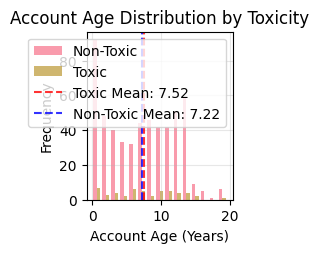

In [29]:

# 1. How does the age of a user's account correlate with the likelihood of them posting a toxic comment?
plt.subplot(2, 3, 1)
toxic_ages = df[df['toxicity'] == 1]['account_age_years']
non_toxic_ages = df[df['toxicity'] == 0]['account_age_years']

plt.hist([non_toxic_ages, toxic_ages], bins=15, label=['Non-Toxic', 'Toxic'], alpha=0.7)
plt.xlabel('Account Age (Years)')
plt.ylabel('Frequency')
plt.title('Account Age Distribution by Toxicity')
plt.legend()
plt.grid(True, alpha=0.3)

# Add summary statistics
toxic_mean = toxic_ages.mean()
non_toxic_mean = non_toxic_ages.mean()
plt.axvline(toxic_mean, color='red', linestyle='--', alpha=0.8, label=f'Toxic Mean: {toxic_mean:.2f}')
plt.axvline(non_toxic_mean, color='blue', linestyle='--', alpha=0.8, label=f'Non-Toxic Mean: {non_toxic_mean:.2f}')
plt.legend()


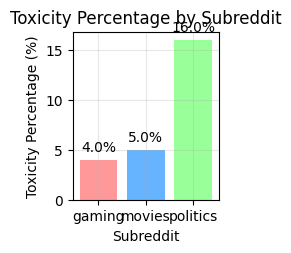

In [30]:
# 2. Do certain Topics have a significantly higher proportion of toxic comments than others?
plt.subplot(2, 3, 2)
toxicity_by_subreddit = df.groupby('subreddit')['toxicity'].agg(['mean', 'count']).reset_index()
toxicity_by_subreddit['toxicity_percentage'] = toxicity_by_subreddit['mean'] * 100

bars = plt.bar(toxicity_by_subreddit['subreddit'], toxicity_by_subreddit['toxicity_percentage'],
               color=['#ff9999', '#66b3ff', '#99ff99'])
plt.xlabel('Subreddit')
plt.ylabel('Toxicity Percentage (%)')
plt.title('Toxicity Percentage by Subreddit')

# Add percentage labels on bars
for bar, percentage in zip(bars, toxicity_by_subreddit['toxicity_percentage']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.grid(True, alpha=0.3)


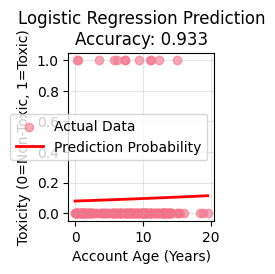

In [31]:
# 3. Can we accurately predict the toxicity of a comment based on account age?
plt.subplot(2, 3, 3)
# Prepare data for logistic regression
X = df[['account_age_years']]
y = df['toxicity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Create prediction visualization
x_range = np.linspace(df['account_age_years'].min(), df['account_age_years'].max(), 100).reshape(-1, 1)
y_proba = model.predict_proba(x_range)[:, 1]

plt.scatter(X_test, y_test, alpha=0.6, label='Actual Data')
plt.plot(x_range, y_proba, color='red', linewidth=2, label='Prediction Probability')
plt.xlabel('Account Age (Years)')
plt.ylabel('Toxicity (0=Non-Toxic, 1=Toxic)')
plt.title(f'Logistic Regression Prediction\nAccuracy: {accuracy:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Conclusion


This initial phase provided a clear overview of the Reddit comment dataset. The key finding is a significant class imbalance, with non-toxic comments greatly outnumbering toxic ones. Preliminary analysis also suggests variations in comment tone across the gaming, movies, and politics subreddits.

These insights are critical for Phase 2, where the focus will shift to feature engineering and building a model that can effectively handle the imbalanced data to predict toxicity.

